In [67]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot

from keras.datasets import mnist




In [68]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [69]:
print('X_train: ' , train_X.shape)
print('Y_train: ', (train_y.shape))
print('X_test:  ', (test_X.shape))
print('Y_test:  ', test_y.shape)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


# DataLoader

In [70]:
class MNIST(Dataset):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
    
    

In [71]:
train_dl = DataLoader(MNIST(train_X, train_y), batch_size=256)
test_dl = DataLoader(MNIST(test_X, test_y), batch_size= 64)

# Criando o Modelo


Irei pegar cada dado, transformar o tensor em um tensor de 1 dimensão e depois aplicar o Linear interpolado por Relu. Já Na saída vou pegar os dados do Linear e sair 10 resultados (0,1,2,3,4...8,9)

In [72]:
class MLP_Model(nn.Module):
    def __init__(self):
        super(MLP_Model,self).__init__()

        
        self.A1 = nn.Flatten()
        self.L1 = nn.Linear(28*28,20)
        self.A2 = nn.ReLU()
        self.L2 = nn.Linear(20,10)
        
        

        
    def forward(self, x):
        
        x = self.A1(x)
        x = self.L1(x)
        x = self.A2(x)
        x = self.L2(x)
        
        
        return x

    

In [73]:
#for xb, yb in train_dl:
#    for i in range(9):  
#        pyplot.subplot(330 + 1 + i)
#        pyplot.imshow(xb[i], cmap=pyplot.get_cmap('gray'))
#        pyplot.show()

In [74]:
L1_value_before_train = torch.histogram(MLP_Model().L1.bias.detach())

X_L1_before = L1_value_before_train[1][0:100]
y_L1_before = L1_value_before_train[0]



# Train

In [75]:
def training( N_Epochs, model, loss_fn, opt  ):
    
    loss_list = []
    
    for epoch in range(N_Epochs+1):
        for xb, yb in train_dl:
            
            y_pred = model(xb.float())
            loss   = loss_fn(y_pred, yb.long())
            
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        
        print(epoch, "loss=", loss.item())
        loss_list.append(loss.item())
            
    
    plt.figure(figsize = (14,6))
    plt.title("cost decay")
    plt.plot(loss_list)
    plt.xlabel("epoch")
    plt.ylabel("cost")
    

0 loss= 0.907634973526001
1 loss= 0.6819915175437927
2 loss= 0.5346591472625732
3 loss= 0.5905550122261047
4 loss= 0.37104055285453796
5 loss= 0.2789934277534485
6 loss= 0.2632140815258026
7 loss= 0.27136746048927307
8 loss= 0.2827050983905792
9 loss= 0.2748429477214813
10 loss= 0.2506740987300873
11 loss= 0.2600194811820984
12 loss= 0.25370362401008606
13 loss= 0.25528857111930847
14 loss= 0.24112381041049957
15 loss= 0.22638416290283203
16 loss= 0.22888655960559845
17 loss= 0.23909102380275726
18 loss= 0.23484428226947784
19 loss= 0.2182614803314209
20 loss= 0.22198764979839325
21 loss= 0.22621363401412964
22 loss= 0.23840691149234772
23 loss= 0.22676758468151093
24 loss= 0.22760428488254547
25 loss= 0.24811452627182007
26 loss= 0.24333231151103973
27 loss= 0.2242804616689682
28 loss= 0.2200133204460144
29 loss= 0.25486788153648376
30 loss= 0.21299444139003754


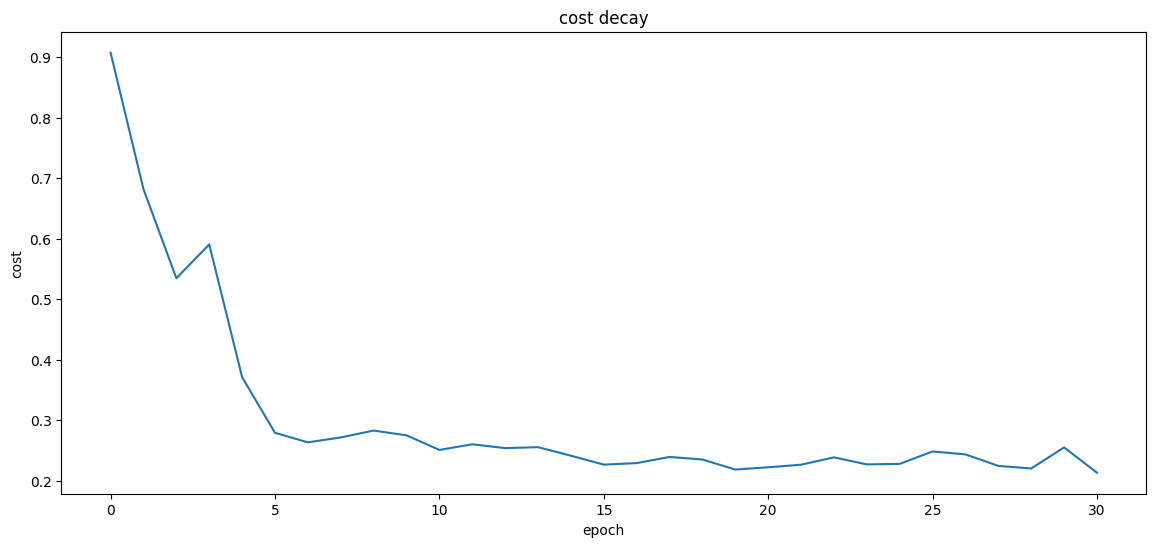

In [76]:
model = MLP_Model()

epochs = 30

opt        = torch.optim.Adam( model.parameters(), lr=0.003 )

loss_fn    = nn.CrossEntropyLoss()   

training(  epochs, model , loss_fn, opt  )


In [77]:
#model = torch.load("MLP_Model.pt")

# Evaluation

In [78]:
# lambda function, 
# model.predict = lambda x : nn.Softmax()(model.net(x))
        

In [79]:
with torch.no_grad():
    
    model.eval()
    
    y_pred = []
    y_true = []

    for xb, yb in test_dl:
        y_predb = model(xb.float())
        y_pred.append(y_predb)
        y_true.append(yb)
        
    y_pred = torch.cat(y_pred)
    y_true = torch.cat(y_true)
  
    yf     = torch.argmax(y_pred, dim=1)

    print(classification_report(y_true, yf))        
    
 


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       980
           1       0.90      0.97      0.94      1135
           2       0.96      0.72      0.82      1032
           3       0.80      0.67      0.73      1010
           4       0.88      0.93      0.91       982
           5       0.60      0.89      0.72       892
           6       0.96      0.92      0.94       958
           7       0.92      0.91      0.92      1028
           8       0.80      0.74      0.77       974
           9       0.91      0.86      0.89      1009

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



# Histogramas

Layer 1


In [80]:
L1_value_after_train = torch.histogram(MLP_Model().L1.bias.detach())

X_L1_after = L1_value_after_train[1][0:100]
y_L1_after = L1_value_after_train[0]

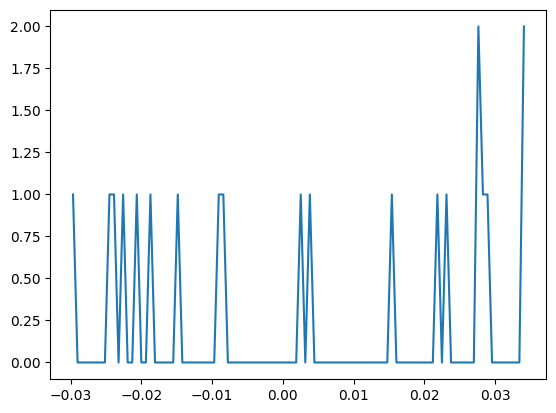

In [81]:
hist_before_train = plt.plot(X_L1_before,y_L1_before)

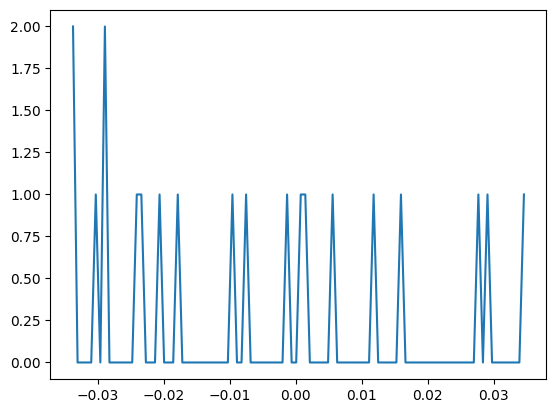

In [82]:
hist_after_train = plt.plot(X_L1_after,y_L1_after)

# Rede Convulucional